### Evaluate performance/ scaling of Smith solver

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pickle
import sys
import time
from tqdm import tqdm

%load_ext autoreload
%autoreload 2

sys.path.append('../../ready functions in py/')

from helper_fcts import generate_random_bot_problem, generate_random_binary_tree_topo
from iterative_BOT_solver import iterative_bot_solver

In [8]:
num_terminals = 100
N = 1000
time_arr = np.zeros(N)
time_arr_low = np.array([])
time_arr_high = np.array([])

for k in tqdm(range(N)):
    # generate random bot problem:
    num_sources = np.random.randint(1, num_terminals)
    num_sinks = num_terminals - num_sources
    bot_problem_dict = generate_random_bot_problem(num_sources, num_sinks, normalised_to=1, dim=2,
                                                           max_length=1.)

    al = bot_problem_dict["al"]
    coords_sources = bot_problem_dict["coords_sources"]
    coords_sinks = bot_problem_dict["coords_sinks"]
    supply_arr = bot_problem_dict["supply_arr"]
    demand_arr = bot_problem_dict["demand_arr"]

    # generate random full tree topology:
    topo = generate_random_binary_tree_topo(num_terminals)

    time0 = time.time()
    cost, coords_iter = iterative_bot_solver(topo, supply_arr, demand_arr, coords_sources, coords_sinks, al,
                                             relative_improvement_threshold=1e-6, min_iterations=-1,
                                             max_iterations=2000,
                                             plot=False, title="", fov=None, save=False, save_name="img")
    
    dt = time.time() - time0
    time_arr[k] = dt
    if al <= 0.5:
        time_arr_low = np.append(time_arr_low, dt)
    else:
        time_arr_high = np.append(time_arr_high, dt)
        
# store the results in a pickle file:
results_dict = {"time_arr":time_arr, "time_arr_low":time_arr_low, "time_arr_high":time_arr_high}
pkl_file_path = f"smith_size{num_terminals}.pkl"
output = open(pkl_file_path, 'wb')
pickle.dump(results_dict, output)
output.close()

 21%|██▏       | 214/1000 [00:17<01:04, 12.21it/s]


KeyboardInterrupt: 

In [3]:
# plot the result:
sizes = [10,20,30,50,70,100,150,200,300,400,500,600,700,800,900,1000]
mean_arr = np.zeros(len(sizes))
std_arr = np.zeros(len(sizes))
mean_low_arr = np.zeros(len(sizes))
mean_high_arr = np.zeros(len(sizes))

for i,size in enumerate(sizes):
    pkl_file_path = f"results/smith_size{size}.pkl"
    pkl_file = open(pkl_file_path, 'rb')
    results_dict = pickle.load(pkl_file)
    pkl_file.close()
    
    mean_arr[i] = np.mean(results_dict["time_arr"])
    std_arr[i] = np.std(results_dict["time_arr"])
    mean_low_arr[i] = np.mean(results_dict["time_arr_low"])
    mean_high_arr[i] = np.mean(results_dict["time_arr_high"])

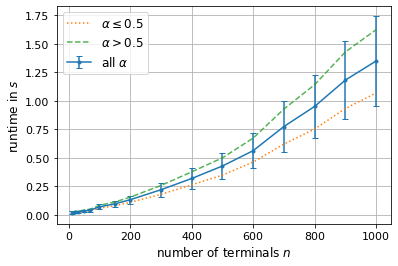

In [7]:
plt.errorbar(sizes, mean_arr, yerr=std_arr, fmt=".-", capsize=3, label="all $\\alpha$")

plt.plot(sizes, mean_low_arr, ":", label="$\\alpha \\leq 0.5$")
plt.plot(sizes, mean_high_arr, "--", label="$\\alpha > 0.5$", alpha = 0.8)


plt.grid()
plt.ylabel("runtime in $s$", fontsize=12)
plt.xlabel("number of terminals $n$", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(fontsize=12)
plt.savefig("smith.pdf")
plt.show()

In [18]:
mean_arr

array([0.01877156, 0.02470119, 0.0273921 , 0.03430381, 0.04154914,
       0.07028731, 0.09617825, 0.13257401, 0.4280231 , 1.34863901])

In [5]:
num_terminals = 1000
num_sources = np.random.randint(1, num_terminals)
num_sinks = num_terminals - num_sources
bot_problem_dict = generate_random_bot_problem(num_sources, num_sinks, normalised_to=1, dim=2,
                                                       max_length=1.)

al = bot_problem_dict["al"]
coords_sources = bot_problem_dict["coords_sources"]
coords_sinks = bot_problem_dict["coords_sinks"]
supply_arr = bot_problem_dict["supply_arr"]
demand_arr = bot_problem_dict["demand_arr"]

# generate random full tree topology:
topo = generate_random_binary_tree_topo(num_terminals)

In [6]:
%%timeit

cost, coords_iter = iterative_bot_solver(topo, supply_arr, demand_arr, coords_sources, coords_sinks, al,
                                             relative_improvement_threshold=1e-6, min_iterations=-1,
                                             max_iterations=2000,
                                             plot=False, title="", fov=None, save=False, save_name="img")

2.34 s ± 66.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
